In [1]:
import axelrod
import numpy as np

from matplotlib import pyplot as plt

from matk.axelrod.strategies import RandomTitFor2Tats, GrimTrigger
%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

# First Run

Analysing: 100%|██████████| 25/25 [00:00<00:00, 373.54it/s]


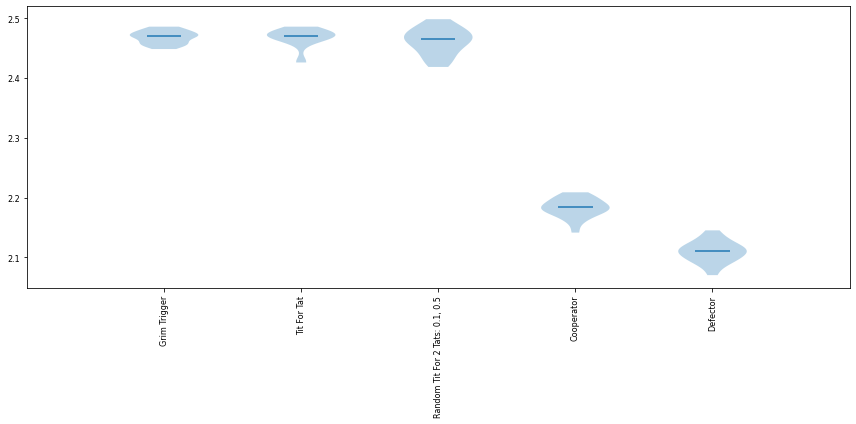

In [2]:
players = [axelrod.Cooperator(), RandomTitFor2Tats(p=0.1, p_c=0.5), axelrod.Defector(), axelrod.TitForTat(), GrimTrigger()]
tournament = axelrod.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
axelrod.Plot(results).boxplot();

In [3]:
print("Normed results: {}".format(np.array(results.normalised_scores).mean(1)))

Normed results: [2.1826875 2.461875  2.10925   2.467875  2.468625 ]


# Choose best RandomTitFor2Tats

In [49]:
def take_exp(p_in, p_c_inp):
    players_t = [axelrod.Cooperator(), RandomTitFor2Tats(p=p_in, p_c=p_c_inp), axelrod.Defector(), axelrod.TitForTat(), GrimTrigger()]
    tournament_t = axelrod.Tournament(players_t, turns=200, repetitions=20)
    results_t = tournament_t.play()
    normed_scores = np.array(results_t.normalised_scores).mean(1)
    return normed_scores

In [50]:
p_list = np.arange(0.0, 1.0, 0.05)
p_c_list = np.arange(0.0, 1.0, 0.05)
results = []
arguments = []
for p_t in p_list:
    for p_c_t in p_list:
        results.append(take_exp(p_t, p_c_t))
        arguments.append([p_t, p_c_t])

Analysing: 100%|██████████| 25/25 [00:00<00:00, 373.08it/s]


In [52]:
results = np.array(results)
results_diff = results[:,1][:,None] - results

In [57]:
results_diff_stack = np.stack([results_diff[:,0],results_diff[:,2],results_diff[:,3],results_diff[:,4]], axis=-1)

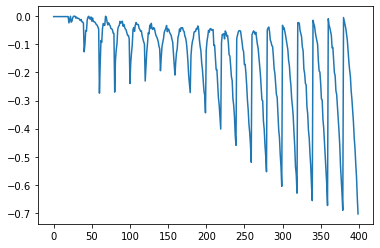

In [58]:
plt.plot(results_diff.min(1));

In [68]:
arguments = np.array(arguments)

In [69]:
results_diff_stack.min(1).max(), results_diff_stack.min(1).argmax(), arguments[results_diff_stack.min(1).argmax()]

(0.012249999999999428, 22, array([0.05, 0.1 ]))

In [71]:
arguments[results_diff_stack.min(1) > 0]

array([[0.05, 0.1 ],
       [0.05, 0.3 ],
       [0.05, 0.35],
       [0.05, 0.4 ],
       [0.1 , 0.3 ],
       [0.15, 0.4 ]])

In [72]:
results[results_diff_stack.min(1).argmax()]

array([2.180625, 2.48175 , 2.02675 , 2.4695  , 2.466125])